<a href="https://colab.research.google.com/github/Rendy3001/BDS/blob/main/SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Logistic regression to predict whether selected variable have an influence on adopting digital paymenent services.

In [1]:
import pandas as pd

In [2]:
#Loading the data
data_url = 'https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip'
data = pd.read_csv(data_url, encoding='latin-1')

In [ ]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [ ]:
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
regionwb,1000
age,467
emp_in,3502
urbanicity_f2f,68243
account_mob,61181
...,...
fin45_1,33106
fin45_1_China,140387
receive_agriculture,29606
remittances,29606


#For the purpose of our hypthesis, we will have a closer look on columns: 'age', 'internetaccess', 'inc_q', 'educ', 'urbancity_f2f'

In [3]:
# Removing the rows with missing values in 'age', 'internetaccess', 'inc_q', 'educ' and 'urbanicity_f2f', 'anydigpayment'
data_cleaned = data.dropna(subset=['age', 'internetaccess', 'inc_q', 'educ', 'urbanicity_f2f', 'anydigpayment']).copy()

# Removing columns with more than 4000 missing values
missing_threshold = 4000
cols_to_drop = data_cleaned.columns[data_cleaned.isnull().sum() > missing_threshold]

# Dropping the columns
data_cleaned = data_cleaned.drop(columns=cols_to_drop)

# Cleaned dataset info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75580 entries, 0 to 143886
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   economy              75580 non-null  object 
 1   economycode          75580 non-null  object 
 2   regionwb             75580 non-null  object 
 3   pop_adult            75580 non-null  float64
 4   wpid_random          75580 non-null  int64  
 5   wgt                  75580 non-null  float64
 6   female               75580 non-null  int64  
 7   age                  75580 non-null  float64
 8   educ                 75580 non-null  int64  
 9   inc_q                75580 non-null  int64  
 10  emp_in               75580 non-null  float64
 11  urbanicity_f2f       75580 non-null  float64
 12  account              75580 non-null  int64  
 13  account_fin          75580 non-null  int64  
 14  fin2                 75580 non-null  int64  
 15  fin14_1              75580 non-null  int

In [ ]:
remaining_missing = data_cleaned.isnull().sum()
remaining_missing[remaining_missing > 0]

,0


I have decided to use Logistic regression because of binary values in this dataset. The Random forest was chosen to investigate differences in the accuracy of the models.

The first step will be to encode and convert selected variables.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#Standardizing age values
scaler = StandardScaler()
data_cleaned['age_scaled'] = scaler.fit_transform(data_cleaned[['age']])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Defining features and target variable
#Creating features in order to apply more independent variables
features = ['age_scaled', 'internetaccess', 'inc_q', 'educ', 'urbanicity_f2f']
X = data_cleaned[features]
y = data_cleaned['anydigpayment']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_model_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_model_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8191
           1       0.64      0.62      0.63      6925

    accuracy                           0.66     15116
   macro avg       0.66      0.66      0.66     15116
weighted avg       0.66      0.66      0.66     15116



#Hyperparameters tuning

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

scorer = make_scorer(mean_squared_error)

Hyperparameter tuning for LogisticRegression using solvers

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_lr, param_grid=grid, n_jobs=-1, cv=cv, scoring=scorer, error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
# Get the estimator.
best_reg = grid_result.best_estimator_

# Fit the new model.
best_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [ ]:
# LogisticRegression model performance on TRAIN data
best_reg.score(X_train, y_train)

0.6751124636147129

In [ ]:
# LogisticRegression model performance on TEST data
best_reg.score(X_test, y_test)

0.662609155861339

Classification report plots

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


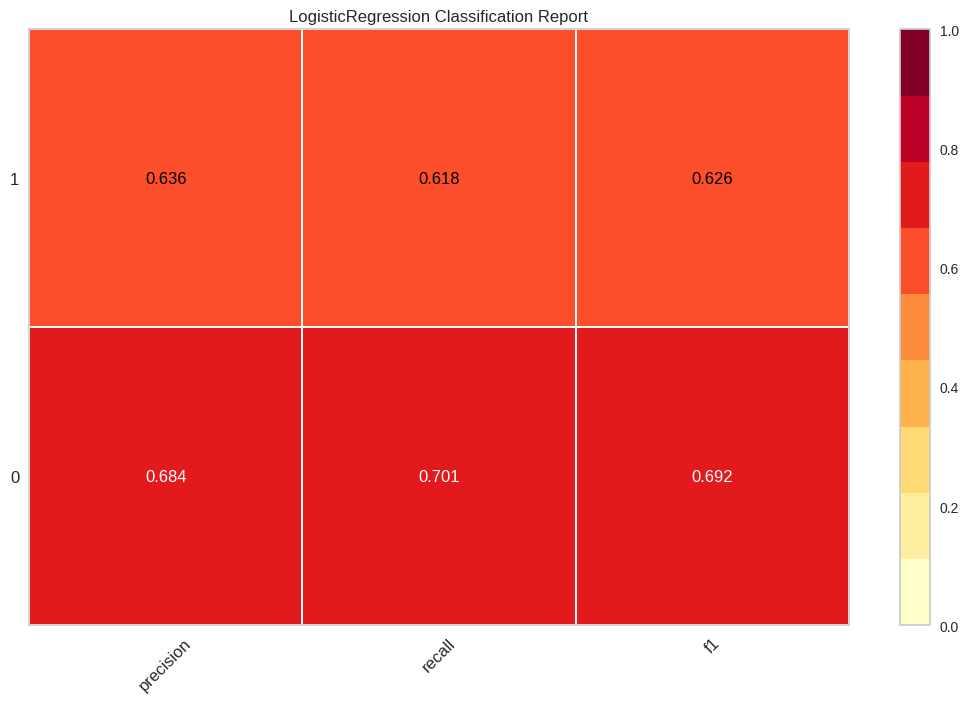

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(model_lr, size=(1080, 720))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Feature importance plot

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


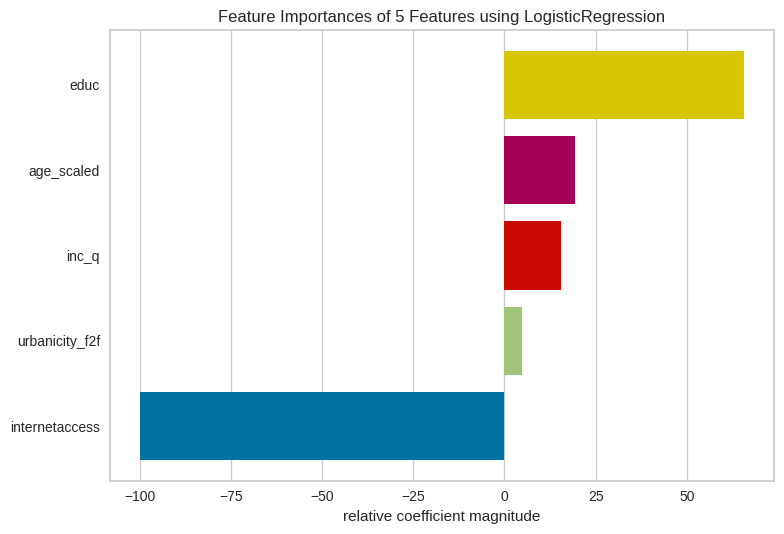

<Axes: title={'center': 'Feature Importances of 5 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model_lr)
viz.fit(X, y)
viz.show()

In [ ]:
#Creating features in order to apply more independent variables
features = ['age_scaled', 'internetaccess', 'inc_q', 'educ']
X = data_cleaned[features]
y = data_cleaned['anydigpayment']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_model_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_model_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      8191
           1       0.64      0.62      0.63      6925

    accuracy                           0.66     15116
   macro avg       0.66      0.66      0.66     15116
weighted avg       0.66      0.66      0.66     15116

Random Forest Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8191
           1       0.65      0.62      0.63      6925

    accuracy                           0.67     15116
   macro avg       0.67      0.67      0.67     15116
weighted avg       0.67      0.67      0.67     15116



In [ ]:
#Creating features in order to apply more independent variables
features = ['age_scaled', 'internetaccess', 'educ']
X = data_cleaned[features]
y = data_cleaned['anydigpayment']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_model_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_model_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      8191
           1       0.64      0.62      0.63      6925

    accuracy                           0.66     15116
   macro avg       0.66      0.66      0.66     15116
weighted avg       0.66      0.66      0.66     15116

Random Forest Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      8191
           1       0.67      0.58      0.62      6925

    accuracy                           0.67     15116
   macro avg       0.67      0.67      0.67     15116
weighted avg       0.67      0.67      0.67     15116



In [ ]:
features = ['age_scaled', 'internetaccess', 'inc_q']
X = data_cleaned[features]
y = data_cleaned['anydigpayment']

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_model_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_model_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      8191
           1       0.64      0.62      0.63      6925

    accuracy                           0.66     15116
   macro avg       0.66      0.66      0.66     15116
weighted avg       0.66      0.66      0.66     15116

Random Forest Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      8191
           1       0.67      0.58      0.62      6925

    accuracy                           0.67     15116
   macro avg       0.67      0.67      0.67     15116
weighted avg       0.67      0.67      0.67     15116



In [ ]:
features = ['age_scaled', 'inc_q', 'educ']
X = data_cleaned[features]
y = data_cleaned['anydigpayment']

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_model_lr = model_lr.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_model_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      8191
           1       0.64      0.62      0.63      6925

    accuracy                           0.66     15116
   macro avg       0.66      0.66      0.66     15116
weighted avg       0.66      0.66      0.66     15116

Random Forest Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      8191
           1       0.67      0.58      0.62      6925

    accuracy                           0.67     15116
   macro avg       0.67      0.67      0.67     15116
weighted avg       0.67      0.67      0.67     15116

